# DATA PREPARATION – Assessment Project _ TSLA_B
JULY CRISTY DA SILVA NAVARRO - 2021147 


### 1 INTRODUCTION 

For this project, it will be used the data file TSLA_B to analyse and report all steps required, such as Characterization, Data Preparation as cleaning and renaming, using EDA visualisation, applying PCA, and discussing the Course of Dimensionality.  

First of all, it is essential to know what is TESLA and what this dataset is showing us. 
About TESLA, was founded in 2003. It is a North American automotive and energy storage company. Today is accelerating efforts to sustainable energy, builds not only all-electric vehicles but also is investing to produce infinitely scalable clean energy generation and storage products. (About Tesla | Tesla, 2021)

According to Timo Bozsolik, who is analysing ( Tesla stock data from 2010 to 2020) a very similar data set as our (TSLA_B), it was possible to understand what means most of the feature in our dataset, such as Date (the day that this data happened); Open (opening stock price); High (highest stock price that day); Low( lowest stock price that day); Close ( closing stock price that day); Adj Close ( Adjusted stock price that day); Volume ( Trading volume of stock that day). (Tesla stock data from 2010 to 2020, 2021)



### 2 CHARACTERIZATION 

At this step it is used appropriate Python code to show relevant information about the data set selected. 

First of all, To analyse and work on this data set “TSLA_B.csv”, it was necessary to import all the libraries below in Python

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Then the file is read with read_csv

In [102]:
tsla_df= pd.read_csv('/Users/julynavarro/Downloads/TSLA_B.csv')

The function head () it is used in this case to show the first 5 lines of our file

In [103]:
tsla_df.head()

,Date,Source,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,0.70,19.00,25.00,17.54,23.89,23.89,18766300
1,30/06/2010,0.40,25.79,30.42,23.30,23.83,23.83,17187100
2,01/07/2010,0.10,25.00,25.92,20.27,21.96,21.96,8218800
3,02/07/2010,0.20,23.00,23.10,18.71,19.20,19.20,5139800
4,06/07/2010,0.60,20.00,20.00,15.83,16.11,16.11,6866900


The function tail() it is used in this case to show the end 5 lines of our file

In [74]:
tsla_df.tail()

,Date,Source,Open,High,Low,Close,Adj Close,Volume
2411,28/01/2020,0.10,568.49,576.81,558.08,566.90,566.90,11788500
2412,29/01/2020,0.10,575.69,589.80,567.43,580.99,580.99,17801500
2413,30/01/2020,0.40,632.42,650.88,618.00,640.81,640.81,29005700
2414,31/01/2020,0.60,640.00,653.00,632.52,650.57,650.57,15719300
2415,03/02/2020,0.40,673.69,786.14,673.52,780.00,780.00,47065000


The function shape is used to show the number of observations, in this case, 2416 rows, and numbers of features or variable, 8 columns.

In [75]:
tsla_df.shape

(2416, 8)

It is important to know the datatype that we have if it is a string (object), float or integer, for this the function dtypes is used. 

In [104]:
tsla_df.dtypes

Date          object
Source        object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

At this point , it is possible to calculate The five number summary, from the function describe () below, that function gives us an overview of what the data set looks like, they are: The minimum, Q1( the first quartile, or the 25% mark), the median (the middle point, or the 50% mark), Q3 (the third quartile, or the 75% mark) and The maximum. Moreover, it shows the mean, the standard deviation and counts all rows, of each numerical variable. 

In [77]:
tsla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.00,2416.00,2416.00,2416.00,2384.00,2416.00
mean,186.27,189.58,182.92,186.40,187.25,5572721.69
std,118.74,120.89,116.86,119.14,118.62,4987809.15
min,16.14,16.63,14.98,15.80,15.80,118500.00
25%,34.34,34.90,33.59,34.40,34.61,1899275.00
50%,213.04,216.75,208.87,212.96,213.74,4578400.00
75%,266.45,270.93,262.10,266.77,266.46,7361150.00
max,673.69,786.14,673.52,780.00,780.00,47065000.00


As using info () I could easily know the name of each column, the number of rows per column and the type of data for each of these columns, as float64, object and integer in this case. In the end, I can see the amount of memory used to read the file.

In [105]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Source     2413 non-null   object 
 2   Open       2416 non-null   float64
 3   High       2416 non-null   float64
 4   Low        2416 non-null   float64
 5   Close      2416 non-null   float64
 6   Adj Close  2384 non-null   float64
 7   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 151.1+ KB


This function below gives me the quality data

In [79]:
tsla_df.describe(include=object)

,Date,Source
count,2416,2413
unique,2416,9
top,08/08/2019,0.20
freq,1,372


The value_counts it is used to see all elements there are in the feature “Source”, as we can see the value 0,20 appears 372 times and the element KL appears once. 

In [80]:
tsla_df['Source'].value_counts()

0.20           372
0.70           363
0.30           357
0.60           344
0.40           336
0.10           333
0.50           306
99999999.00      1
kl               1
Name: Source, dtype: int64

### 3 DATA PREPARATION

After analyzing all characteristic of the data set, this step is certainly needed, to clean irrelevant information and prepare our dataset. 

At this step, it is possible to analyse if there are missing values in the dataset in two ways:

Using function info(), as we can see, the data set there is a range of 2416 entries.
So if there are 2416 rows and if any column there are less than 2416, I can say that there are missing values in my data set.  

For example, at variable “Source” there are 2413 rows, which means that there are (2416 - 2413) 3 missing values. The same happens to the variable “Adj Close” which means that there are (2416 - 2384) 32 missing values.


In [81]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Source     2413 non-null   object 
 2   Open       2416 non-null   float64
 3   High       2416 non-null   float64
 4   Low        2416 non-null   float64
 5   Close      2416 non-null   float64
 6   Adj Close  2384 non-null   float64
 7   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 151.1+ KB


Also, It is possible to see missing values using the function isnull().sum().

In [82]:
print(tsla_df.isnull().sum())

Date          0
Source        3
Open          0
High          0
Low           0
Close         0
Adj Close    32
Volume        0
dtype: int64


For this dataset, I decided not to remove the null value but to change them to approximate values. For this, the function 'interpolate' was used to interpolate the data.
However, if I have had decided to drop the missing values, I could use The function (df.dropna())

In [83]:
# Before interpolate
tsla_df.iloc[2384:2387,:]

,Date,Source,Open,High,Low,Close,Adj Close,Volume
2384,17/12/2019,0.40,378.99,385.50,375.90,378.99,378.99,8496800
2385,18/12/2019,0.40,380.63,395.22,380.58,393.15,nan,14121000
2386,19/12/2019,0.60,397.32,406.85,396.50,404.04,404.04,18107100


In [84]:
tsla_df['Adj Close'].interpolate(method='linear', inplace=True)

In [85]:
# After interpolate
tsla_df.iloc[2384:2387,:]

,Date,Source,Open,High,Low,Close,Adj Close,Volume
2384,17/12/2019,0.40,378.99,385.50,375.90,378.99,378.99,8496800
2385,18/12/2019,0.40,380.63,395.22,380.58,393.15,391.51,14121000
2386,19/12/2019,0.60,397.32,406.85,396.50,404.04,404.04,18107100


In [86]:
print(tsla_df.isnull().sum())

Date         0
Source       3
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


For this step, after I analyse the feature "Source", I decide to drop it; there is no relation with the dataset from my point of view. For this, it was used the function below.

In [87]:
tsla_df['Source'].value_counts()

0.20           372
0.70           363
0.30           357
0.60           344
0.40           336
0.10           333
0.50           306
99999999.00      1
kl               1
Name: Source, dtype: int64

In [88]:
#dropping  
drop = ['Source']
tsla_df.drop(drop, inplace=True, axis=1)

In [89]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Regarding outliers, one way of saying that they can be outliers in the data set is to analyse the variables. If the mean and the median are different, for example, as we can see in the previous steps (describe), all variables have different mean and median, we can have outliers in this data set. In addition, we can use the chart below that shows us the outliers. In this case, it is easy to view the outliers, especially in the “Volume” variables. But in my view, as this dataset is about stock price data, it is probably that these values ​​are not outliers, so I decided not to remove the possible outliers.


<AxesSubplot:xlabel='Volume'>

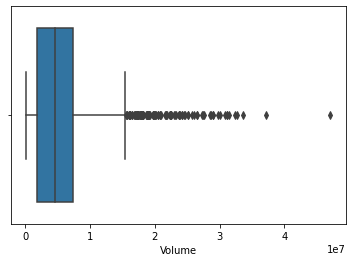

In [90]:
sns.boxplot(x=tsla_df['Volume'])

In [91]:
tsla_boxplot=tsla_df.drop(['Date', 'Volume'],axis=1)

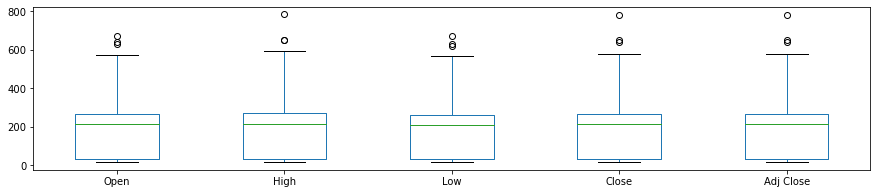

In [92]:
tsla_boxplot.plot(kind='box', figsize=(15, 3))
plt.show()

The function duplicate_rows () it is used in this case to see if there are duplicate data in the rows.

In [93]:
duplicate_rows_tsla_df = tsla_df[tsla_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_tsla_df.shape)

number of duplicate rows:  (0, 7)


The function pd.to_datetime was used to format the variable Date

In [94]:
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])

In [95]:
tsla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-01-07,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-02-07,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-06-07,20.00,20.00,15.83,16.11,16.11,6866900


To improve the visual analysis of the data the function below was used to reduce as decimal places

In [96]:
pd.set_option('float_format', '{:.2f}'.format)
tsla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-01-07,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-02-07,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-06-07,20.00,20.00,15.83,16.11,16.11,6866900


At this step, I included a new variable to check if the variable "Close" has the same values as "Adj. Close", i subtracted one to the other and conclude that there are no different values between them. 

In [97]:
tsla_df['Close_Adj_Close_Diff']=tsla_df['Adj Close']-tsla_df['Close']
tsla_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Adj_Close_Diff
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300,0.00
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100,0.00
2,2010-01-07,25.00,25.92,20.27,21.96,21.96,8218800,0.00
3,2010-02-07,23.00,23.10,18.71,19.20,19.20,5139800,0.00
4,2010-06-07,20.00,20.00,15.83,16.11,16.11,6866900,0.00


Using the function below, I could see the values ​​that appear different are the null values ​​that I changed by interpolating in the previous steps. We can see that I would have another option to change the null values ​​that could also match the null values ​​of the variable "Adj Close" with "Close" to solve it. 

In [99]:
tsla_df['Close_Adj_Close_Diff'].value_counts()

0.00     2384
-6.92       1
-0.33       1
-5.43       1
3.31        1
0.66        1
-0.66       1
-0.21       1
4.49        1
0.50        1
-1.26       1
-0.92       1
6.05        1
-1.02       1
-0.03       1
4.80        1
0.49        1
-0.20       1
0.43        1
-8.04       1
-1.36       1
-0.85       1
-1.67       1
-0.22       1
-1.63       1
0.14        1
0.39        1
0.38        1
0.05        1
6.10        1
4.64        1
-0.61       1
-0.90       1
Name: Close_Adj_Close_Diff, dtype: int64

After that, i can delete the new variable using the function below, as i do not need it anymore. 

In [100]:
tsla_df=tsla_df.drop(columns=['Close_Adj_Close_Diff'])
tsla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-01-07,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-02-07,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-06-07,20.00,20.00,15.83,16.11,16.11,6866900


### 4 EXPLORATORY DATA ANALYSIS - EDA (visualization)

EAD is used To understand the data set, summarise its main characteristics, and generate visualization graphs to understand the data sets, plotting them visually. For example, the types of charts as I used below 

This graph shows the correlation between features. As we can see, most of the variables, unless volume, has a high level of correlation 

<Figure size 504x504 with 0 Axes>

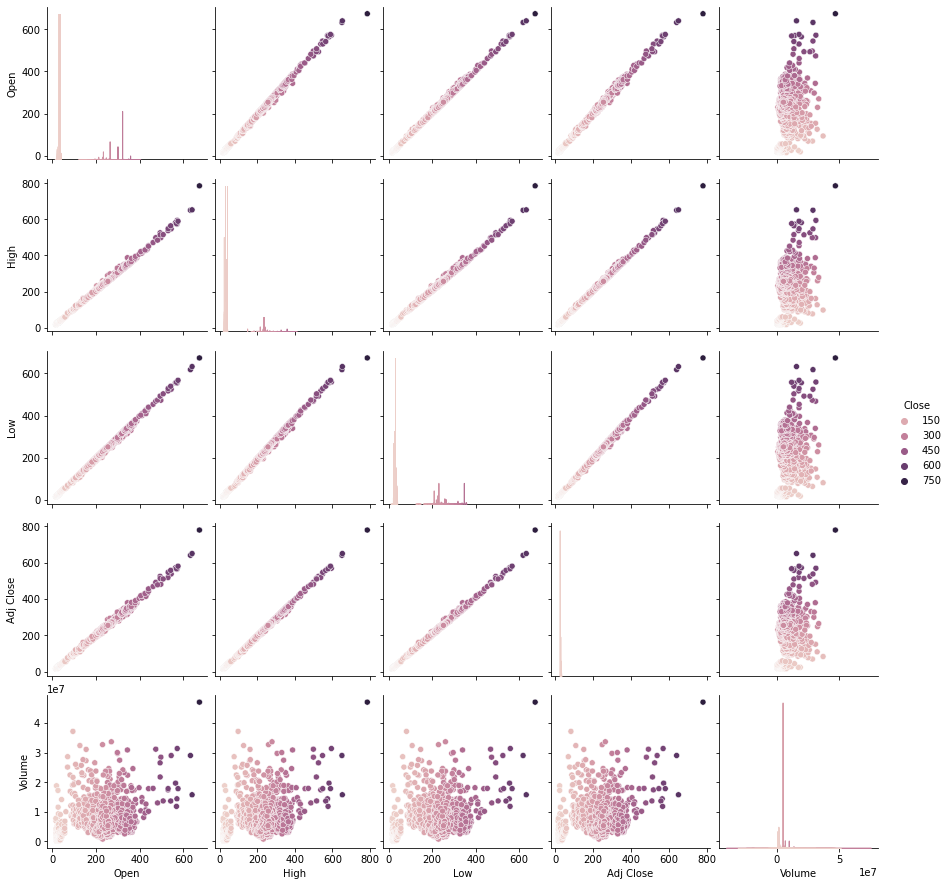

<Figure size 504x504 with 0 Axes>

In [101]:
sns.pairplot(tsla_df, hue = 'Close')
plt.figure(figsize=(7,7))

At this step, the Heat Maps were used as another way of presenting the correlations between quantitative variables, where the colours of each indicate a correlation. For example, as we can see the dark green is the most correlated, and dark brown is the less correlated between the variables. 

<AxesSubplot:>

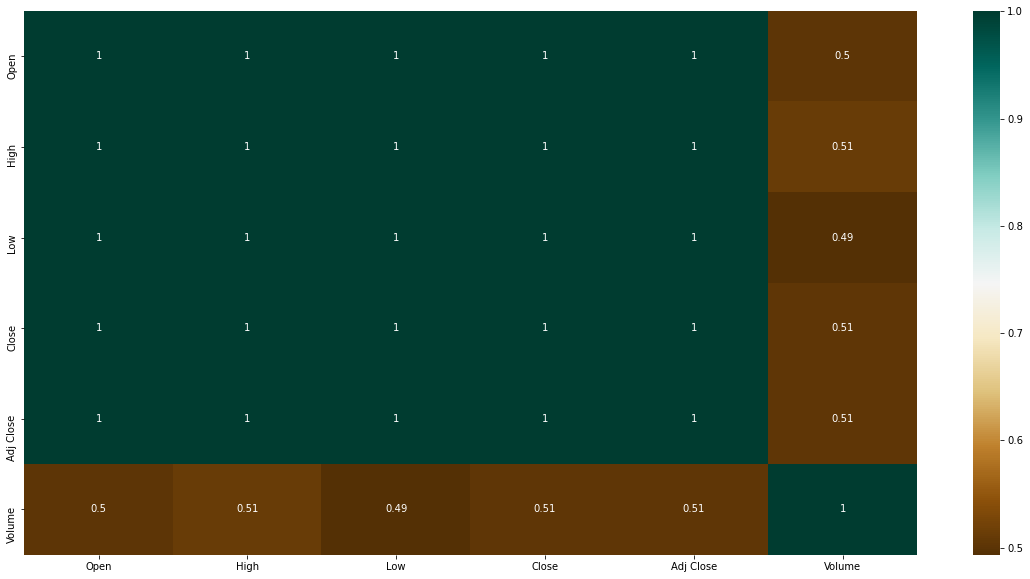

In [32]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= tsla_df.corr() 
sns.heatmap(c,cmap='BrBG',annot=True)

For this step, I chose the scatter plot to illustrate the relationship between the "Open" x "Close" variables.
In this graphic, it is possible to observe the correlation between those data; the two variables are correlated with each other, showing a positive correlation between them. 

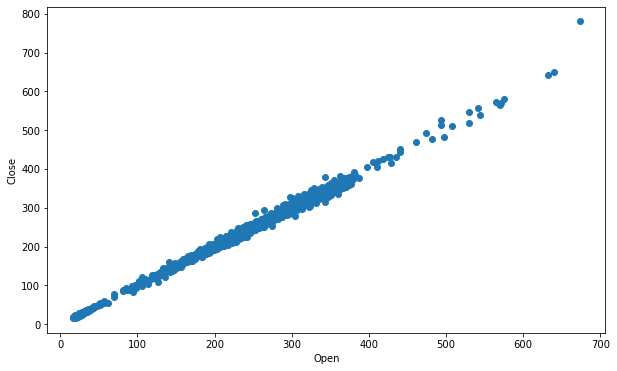

In [33]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(tsla_df['Open'],tsla_df['Close'])
ax.set_xlabel('Open')
ax.set_ylabel('Close')
plt.show()

### 5 PRINCIPAL COMPONET ANALYSIS – PCA

PCA is fundamentally a dimensionality reduction algorithm that gives us the way to filtering noise, applicable to feature extraction, and is also helpful as a tool for visualization. (Google Colaboratory,2021)

To start PCA, it be must import the libraries below.

In [34]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

At this step, it is defined X with the five most correlation components as "Open", "High", "Low","Close", 'Volume". 
After that, it is used the function (scaler.fit_transform(X))to scale the training data at the same scale.

In [35]:
X =(tsla_df[['High','Close','Open','Low','Volume']])
scaler = StandardScaler()
X_scaler=scaler.fit_transform(X)
print(X)

       High  Close   Open    Low    Volume
0     25.00  23.89  19.00  17.54  18766300
1     30.42  23.83  25.79  23.30  17187100
2     25.92  21.96  25.00  20.27   8218800
3     23.10  19.20  23.00  18.71   5139800
4     20.00  16.11  20.00  15.83   6866900
...     ...    ...    ...    ...       ...
2411 576.81 566.90 568.49 558.08  11788500
2412 589.80 580.99 575.69 567.43  17801500
2413 650.88 640.81 632.42 618.00  29005700
2414 653.00 650.57 640.00 632.52  15719300
2415 786.14 780.00 673.69 673.52  47065000

[2416 rows x 5 columns]


In [36]:
print(X_scaler)

[[-1.36164384 -1.36438413 -1.40900745 -1.41549105  2.64571262]
 [-1.31680128 -1.36488785 -1.35181192 -1.3661901   2.32903512]
 [-1.35403219 -1.38058745 -1.35846649 -1.39212445  0.53061896]
 ...
 [ 3.81659683  3.81497063  3.75813192  3.72396373  4.69902289]
 [ 3.83413668  3.89691083  3.82198214  3.84824343  2.0346967 ]
 [ 4.93567537  4.98354095  4.10576966  4.19917046  8.32046028]]


Now Let's use PCA with five components to project the standardized TSLA dataset onto the new principal component axes to apply dimensionality reduction.

In [37]:
pca = PCA(n_components=5)
pc = pca.fit_transform(X_scaler)
print('original shape: ', X.shape) 
print('transformed shape:', pc.shape)

original shape:  (2416, 5)
transformed shape: (2416, 5)


In [38]:
print(pca.components_)

[[ 4.78981570e-01  4.78401747e-01  4.78161353e-01  4.77660123e-01
   2.91394838e-01]
 [-1.32485486e-01 -1.43110394e-01 -1.47803643e-01 -1.59317211e-01
   9.56419950e-01]
 [ 1.30078772e-01  6.83772609e-01 -7.11018052e-01 -9.97490917e-02
  -6.16286621e-03]
 [ 6.68558472e-01 -8.12177280e-02  1.45989984e-01 -7.24436646e-01
  -1.76556141e-02]
 [ 5.37711199e-01 -5.25842071e-01 -4.71864448e-01  4.60109225e-01
  -4.75212508e-04]]


In [39]:
print(pca.explained_variance_)

[4.30661483e+00 6.93897476e-01 1.12867917e-03 3.37558443e-04
 9.18544476e-05]


In this case, we can see that using the five components, we have a 100% variance.

In [40]:
print(pca.explained_variance_ratio_)

[8.60966457e-01 1.38722053e-01 2.25642400e-04 6.74837450e-05
 1.83632857e-05]


In [41]:
var = pca.explained_variance_ratio_.sum() * 100
print('Total Explained Variance: {}%'.format(round(var,2)))

Total Explained Variance: 100.0%


The function below was used to create a new data frame from the results of the transformation, which can be visualized in the graph below.

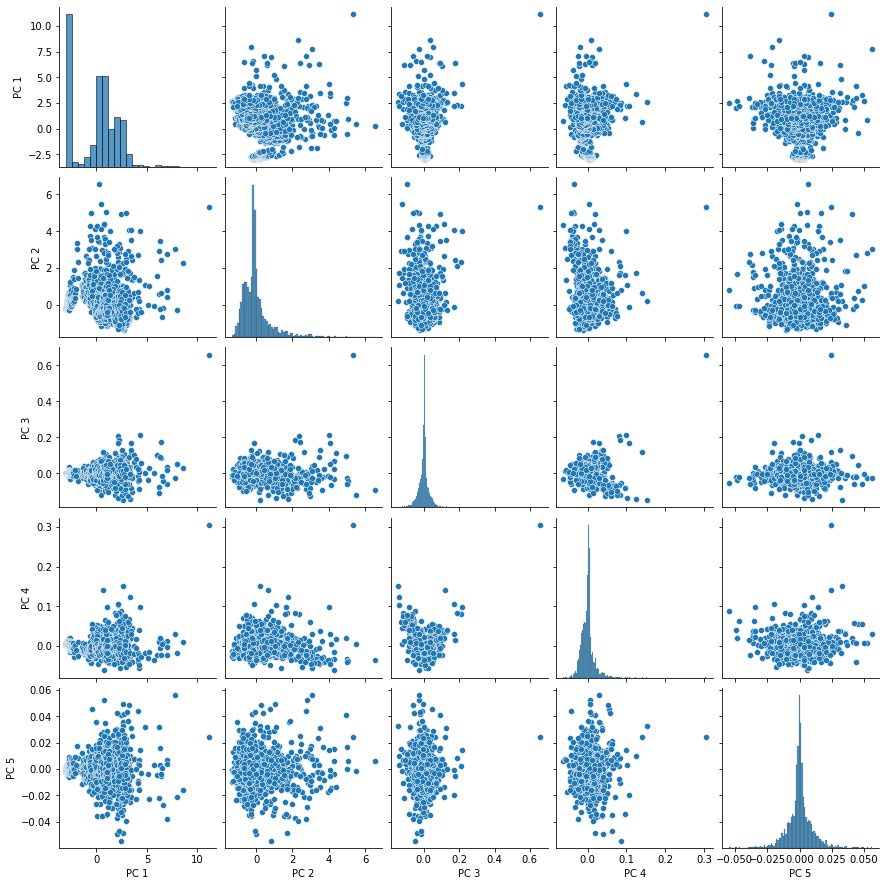

In [42]:
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3','PC 4','PC 5'])
sns.pairplot(pc_df) 
plt.show()


The graph below was plotted to show the difference between the original data compared to the data after the PCA. We can see the transformation of the data dimension.

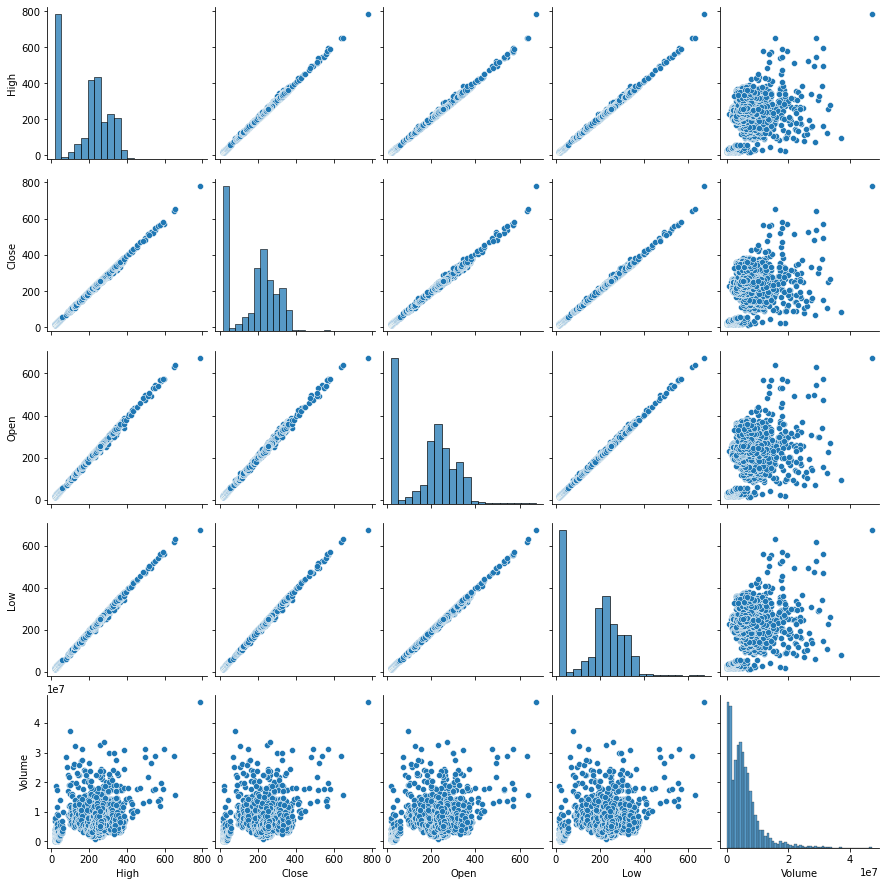

In [43]:
X =(tsla_df[['High','Close','Open','Low','Volume']])
sns.pairplot(X)

For this step, we will run the PCA with two components

In [44]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaler)
print('original shape: ', X.shape) 
print('transformed shape:', pc.shape)

original shape:  (2416, 5)
transformed shape: (2416, 2)


In [45]:
print(pca.components_)

[[ 0.47898157  0.47840175  0.47816135  0.47766012  0.29139484]
 [-0.13248549 -0.14311039 -0.14780364 -0.15931721  0.95641995]]


In [46]:
print(pca.explained_variance_ratio_)

[0.86096646 0.13872205]


In this case, the objective of using the PCA was to establish the minimum number of dimensions necessary to retain 99% variation in the data, reducing the size of five to two components.

In [47]:
var = pca.explained_variance_ratio_.sum() * 100
print('Total Explained Variance: {}%'.format(round(var,2)))

Total Explained Variance: 99.97%


The graph below shows the new data frame from the transformation results, using two components.

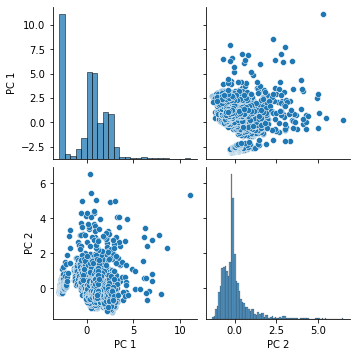

In [48]:
pc_df = pd.DataFrame(pc, columns=['PC 1','PC 2'])
sns.pairplot(pc_df) 
plt.show()

### 6. CURSE OF DIMENSIONALITY

In my opinion, the Curse of dimensionality happens when we have a large number of features, which can often seem the best option for the model, but if they are redundant, it will probably hinder rather than help, because it is possible that when we get to the training session, the model is likely to increase exponentially and as the increase in dimensions is expected that a lot of data will become sparse.

### 7. CONCLUSION 

From my perspective, the steps followed in this Project (TSLA_B), such as analyzing the characteristics, data preparation, EAD and PCA, are essential to remove impurities and optimize the dataset before being used in any machine learning. Also, it was possible to realize how vital it is to reduce the algorithm dimensions.

### 8. REFERENCES 

Colab.research.google.com. 2021. Google Colaboratory. [online] Available at: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb [Accessed 8 May 2021].

Kaggle.com. 2021. Tesla stock data from 2010 to 2020. [online] Available at: https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020 [Accessed 4 May 2021].

Tesla.com. 2021. About Tesla | Tesla. [online] Available at: https://www.tesla.com/en_IE/about?redirect=no  [Accessed 4 May 2021].